In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset :

In [8]:
HouseDF = pd.read_csv('minihomeprices.csv')

In [9]:
HouseDF.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:

# COLUMNS :

HouseDF.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [10]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


# Data Preprocessing :

In [17]:
HouseDF.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [20]:
counter = 0
rs,cs = HouseDF.shape

HouseDF.drop_duplicates(inplace=True)

if HouseDF.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-HouseDF.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [14]:
HouseDF.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [15]:

HouseDF.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [16]:
HouseDF['bedrooms'] = HouseDF['bedrooms'].fillna( HouseDF['bedrooms'].mean() )
HouseDF.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


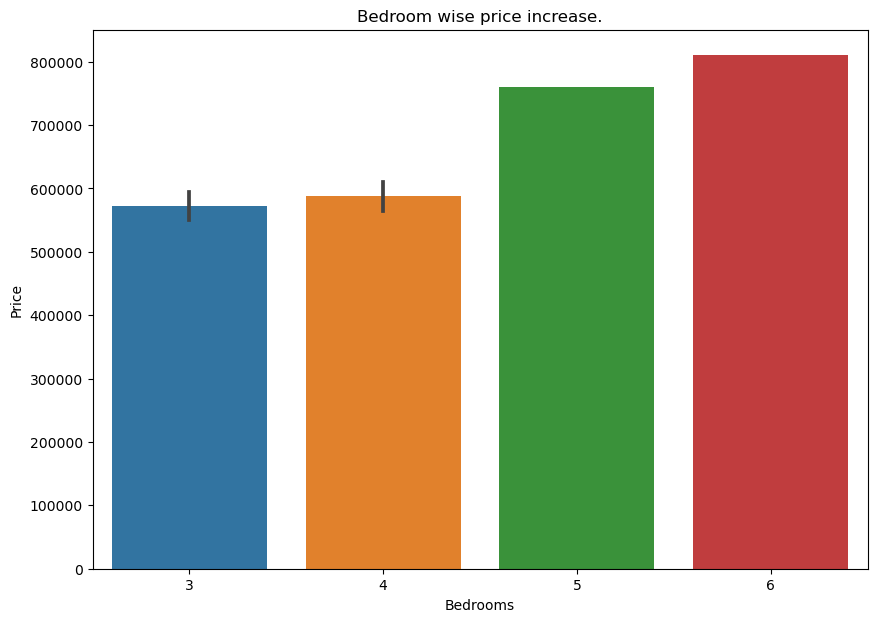

In [60]:
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot(x='bedrooms', y='price', data=HouseDF)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

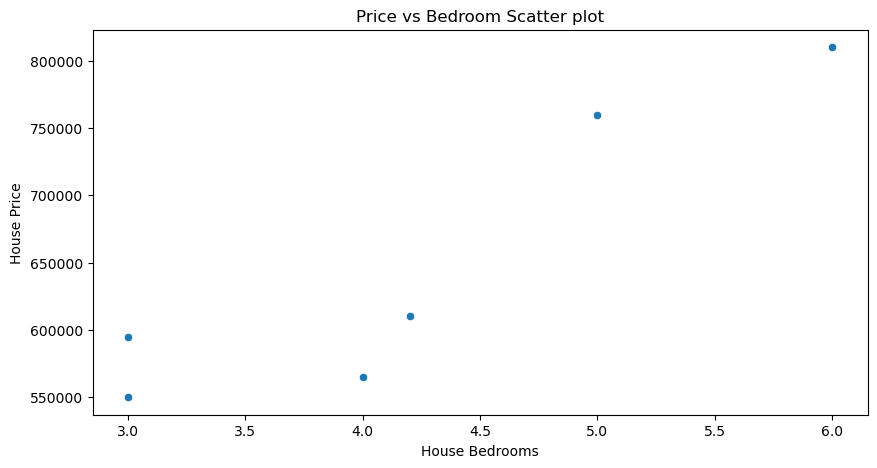

In [26]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='bedrooms', y='price',data=HouseDF)
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

<Figure size 1000x700 with 0 Axes>

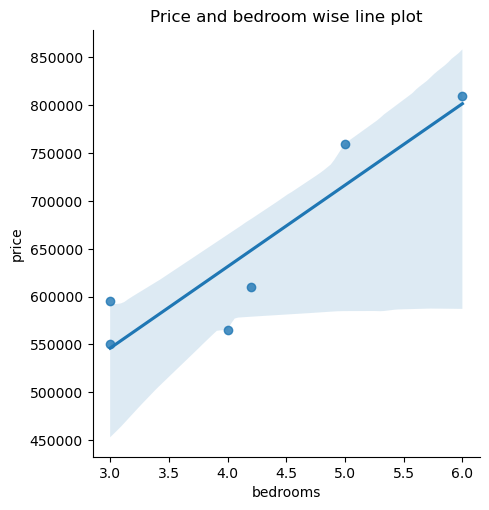

In [27]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=HouseDF);
plt.title("Price and bedroom wise line plot")
plt.show()

# Linear Regression :

In [61]:
from sklearn.metrics import mean_absolute_error

In [47]:
# Instantiate a linear regression model
mdl = LinearRegression()

In [48]:
# Define features and target
X = HouseDF.drop(['price'], axis=1)
y = HouseDF['price']

In [49]:
# Convert 'bedrooms' to int64
HouseDF['bedrooms'] = HouseDF['bedrooms'].astype('int64')

HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 240.0 bytes


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Fit the model to the training data
mdl.fit(X_train, y_train)

LinearRegression()

In [31]:
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [32]:
HouseDF.fillna(HouseDF.mean())

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [62]:
#Evaluation :

In [34]:
mdl.predict([[ 4000, 2, 50 ]])

array([551989.04870256])

In [52]:
train_score = mdl.score(X_train, y_train)
print("Training R^2 score:", train_score)

Training R^2 score: 1.0


In [53]:
# Calculate the coefficient of determination (R^2 score) on the testing data
test_score = mdl.score(X_test, y_test)
print("Testing R^2 score:", test_score)

Testing R^2 score: -29.464307814164474


In [54]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, mdl.predict(X_test))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 39608.20895522431


In [59]:
mdl.coef_

array([  115.67164179, 38432.8358209 , -1902.98507463])

In [58]:
mdl.intercept_

120373.13432834996

In [57]:
score = mdl.score( X, y )
print(score * 100)

94.24316691641629


In [56]:
# Assuming mdl is your fitted model
y_pred = mdl.predict(X)

# Calculate R^2 score
score = r2_score(y, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y, y_pred)

print("R^2 score:", score)
print("Mean Absolute Error:", mae)

R^2 score: 0.9424316691641629
Mean Absolute Error: 13202.73631840857
